In [1]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
import torch
import sklearn
from weapon_data import WeaponData
from cnn import CnnNet
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import itertools
%config InlineBackend.figure_format = 'svg'


In [2]:
dataset = WeaponData()


['billete', 'knife', 'monedero', 'pistol', 'smartphone', 'tarjeta']


In [3]:
net = CnnNet(64, len(dataset.classes),  c_kernels=[3, 3, 3, 3, 3, 3], in_channels=[3, 16, 32, 64, 86, 128, 128], out_channels=[16, 32, 64, 86, 128, 128])
criterion = nn.NLLLoss()
lr = 0.001
optimizer = torch.optim.AdamW(net.parameters(), lr=lr)
loss_test = []

ilość klas: 6
wielkość po warstawach conv: 10


In [4]:
if torch.cuda.is_available():
    net = net.cuda()
    net.cnn = net.cnn.cuda()
    print("GPU is available")
else:
    torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [5]:
def valid_classification(out, d):
    """
        Function calculating valid classification
        @ out - netowerk output
        @ d - destination value
        return: classification correctness in %
        """
    out = out.cpu().detach().numpy()
    d = d.cpu().detach().numpy()
    temp = abs(d - out)
    valid = sum(i < 0.5 for i in temp)
    return valid / temp.shape[0] * 100  # type:ignore


start


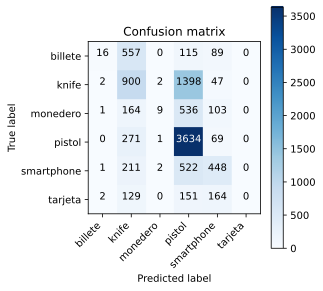

pk: 52.16 %
Learning rate: 0.0010000000
Epoch: 0............. Loss: 1.2038


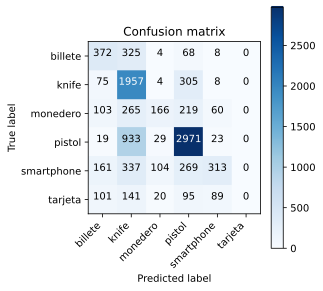

pk: 60.20 %
Learning rate: 0.0010000000
Epoch: 1............. Loss: 1.4135


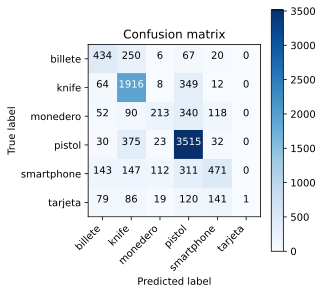

pk: 68.23 %
Learning rate: 0.0010000000
Epoch: 2............. Loss: 0.7992


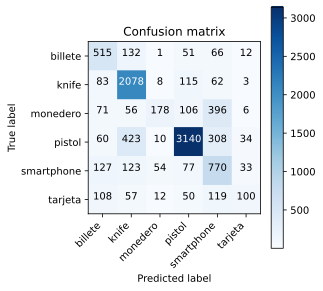

pk: 70.68 %
Learning rate: 0.0010000000
Epoch: 3............. Loss: 0.8907


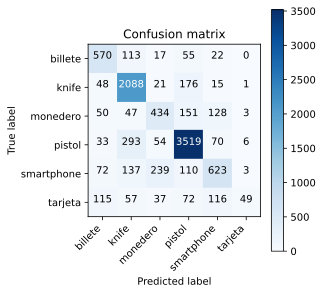

pk: 75.88 %
Learning rate: 0.0010000000
Epoch: 4............. Loss: 0.8059


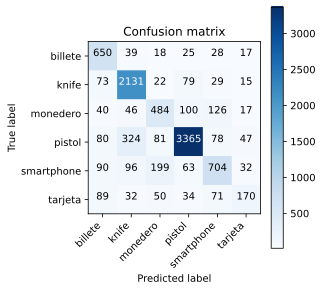

pk: 78.21 %
Learning rate: 0.0010000000
Epoch: 5............. Loss: 0.8794


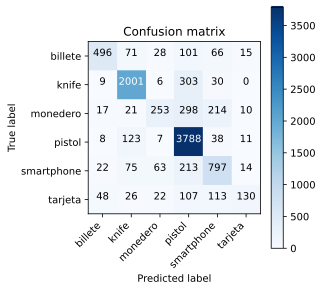

pk: 77.81 %
Learning rate: 0.0010000000
Epoch: 6............. Loss: 0.5930


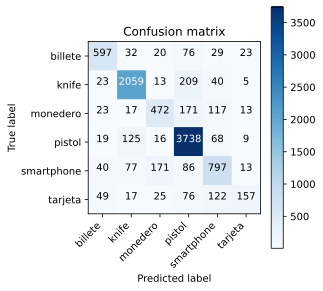

pk: 81.58 %
Learning rate: 0.0010000000
Epoch: 7............. Loss: 0.4587


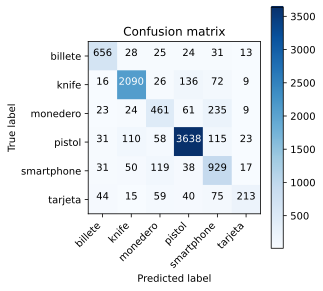

pk: 83.40 %
Learning rate: 0.0010000000
Epoch: 8............. Loss: 0.4756


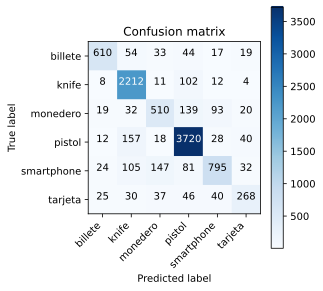

pk: 84.85 %
Learning rate: 0.0010000000
Epoch: 9............. Loss: 0.4775


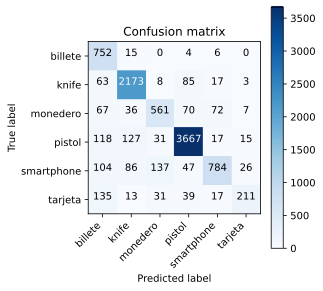

pk: 85.10 %
Learning rate: 0.0010000000
Epoch: 10............. Loss: 0.5465


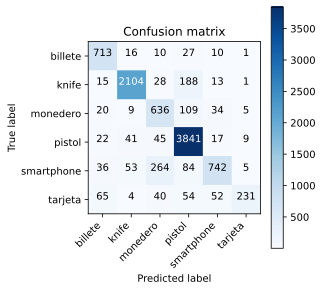

pk: 86.49 %
Learning rate: 0.0010000000
Epoch: 11............. Loss: 0.6312


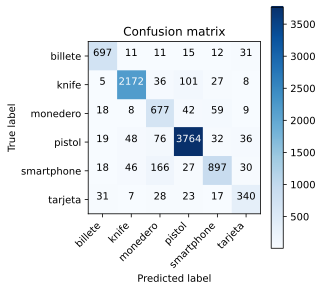

pk: 89.56 %
Learning rate: 0.0010000000
Epoch: 12............. Loss: 0.3836


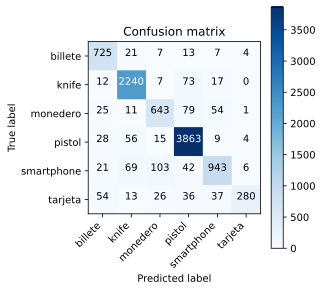

pk: 90.92 %
Learning rate: 0.0010000000
Epoch: 13............. Loss: 0.7030


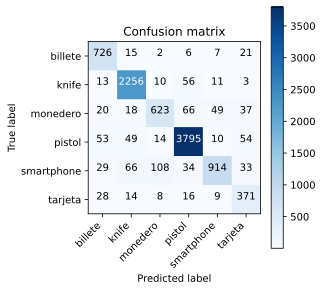

pk: 90.97 %
Learning rate: 0.0010000000
Epoch: 14............. Loss: 0.1612


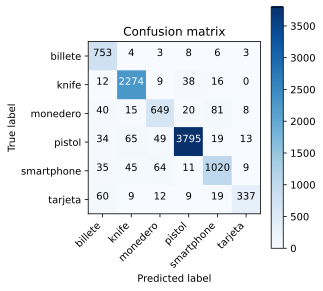

pk: 92.48 %
Learning rate: 0.0010000000
Epoch: 15............. Loss: 0.3589


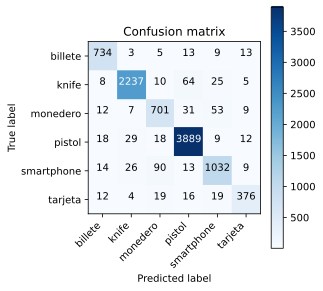

pk: 93.96 %
Learning rate: 0.0010000000
Epoch: 16............. Loss: 0.1141


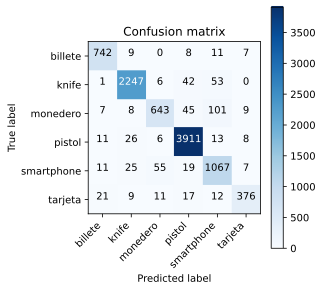

pk: 94.15 %
Learning rate: 0.0010000000
Epoch: 17............. Loss: 0.1944


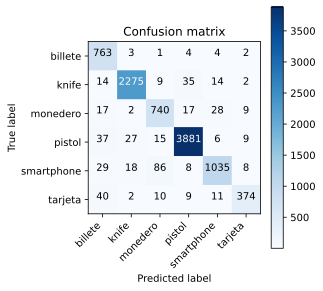

pk: 94.99 %
Learning rate: 0.0010000000
Epoch: 18............. Loss: 0.2063


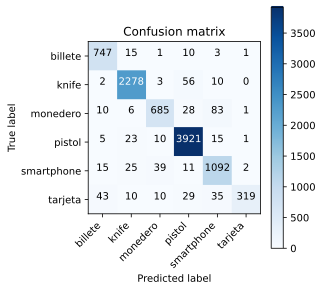

pk: 94.62 %
Learning rate: 0.0010000000
Epoch: 19............. Loss: 0.1973


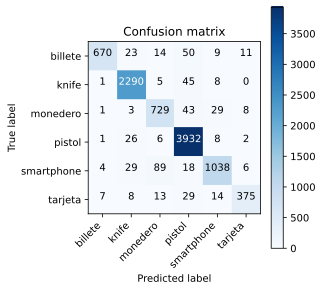

pk: 94.63 %
Learning rate: 0.0010000000
Epoch: 20............. Loss: 0.1318


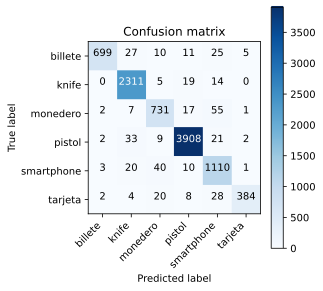

pk: 95.82 %
Learning rate: 0.0010000000
Epoch: 21............. Loss: 0.0903


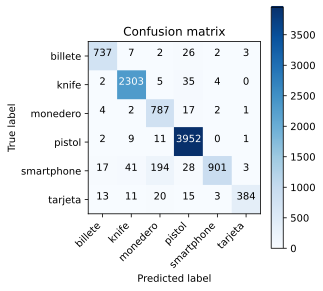

pk: 94.97 %
Learning rate: 0.0010000000
Epoch: 22............. Loss: 0.1979


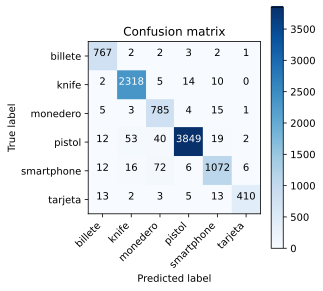

pk: 96.43 %
Learning rate: 0.0010000000
Epoch: 23............. Loss: 0.0920


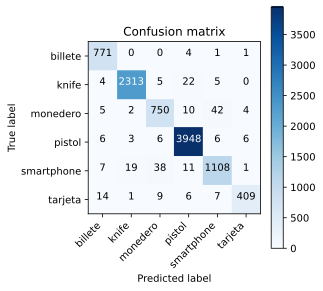

pk: 97.42 %
Learning rate: 0.0010000000
Epoch: 24............. Loss: 0.0512


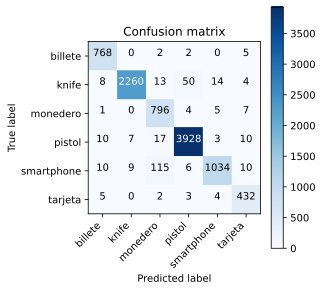

pk: 96.58 %
Learning rate: 0.0010000000
Epoch: 25............. Loss: 0.3731


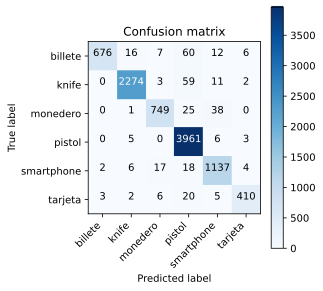

pk: 96.48 %
Learning rate: 0.0010000000
Epoch: 26............. Loss: 0.1743


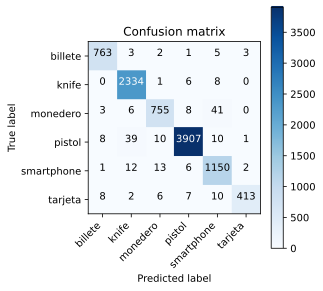

pk: 97.67 %
Learning rate: 0.0010000000
Epoch: 27............. Loss: 0.0938


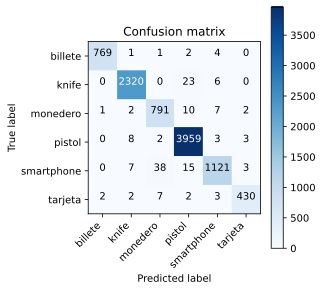

pk: 98.40 %
Learning rate: 0.0010000000
Epoch: 28............. Loss: 0.0813


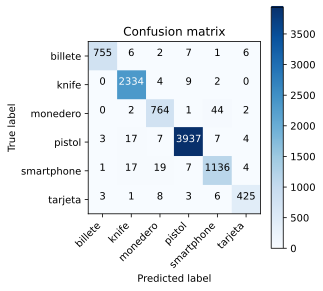

pk: 97.95 %
Learning rate: 0.0010000000
Epoch: 29............. Loss: 0.0517


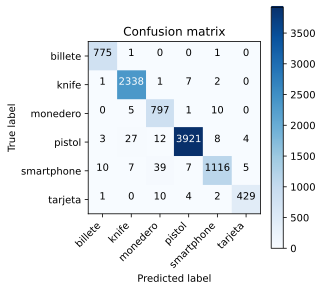

pk: 98.25 %
Learning rate: 0.0010000000
Epoch: 30............. Loss: 0.0465


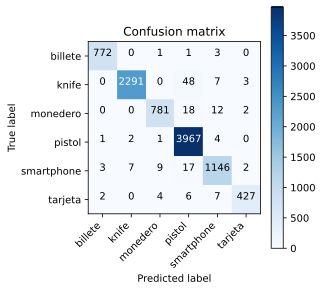

pk: 98.32 %
Learning rate: 0.0010000000
Epoch: 31............. Loss: 0.0555


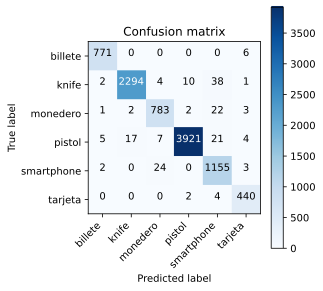

pk: 98.11 %
Learning rate: 0.0010000000
Epoch: 32............. Loss: 0.0478


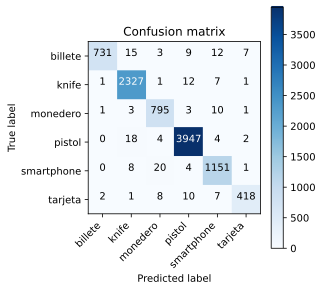

pk: 98.15 %
Learning rate: 0.0010000000
Epoch: 33............. Loss: 0.1333


In [6]:
def plot_confusion_matrix(cm, classes, normalize=False, cmap=cm.Blues, show=True):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix'

    # Calculate chart area size
    leftmargin = 0.5  # inches
    rightmargin = 0.5  # inches
    categorysize = 0.5  # inches
    figwidth = leftmargin + rightmargin + (len(classes) * categorysize)

    f = plt.figure(figsize=(figwidth, figwidth))

    # Create an axes instance and ajust the subplot size
    ax = f.add_subplot(111)
    ax.set_aspect(1)
    f.subplots_adjust(left=leftmargin/figwidth, right=1-rightmargin/figwidth, top=0.94, bottom=0.1)

    res = ax.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)
    plt.colorbar(res)
    ax.set_xticks(range(len(classes)))
    ax.set_yticks(range(len(classes)))
    ax.set_xticklabels(classes, rotation=45, ha='right')
    ax.set_yticklabels(classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    # plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    if show:
        plt.show()
        plt.close(f)
    else:
        plt.close(f)
            
def test():
    loss_t = 0
    pk = []
    y_true = []
    y_pred = []
    with torch.no_grad():
        for data, labels in dataset.testloader:
            labels = labels.cuda()
            data = data.cuda()
            out, _ = net(data)
            output = torch.argmax(out.detach(), dim=1)
            loss = criterion(out, labels)
            loss_t += loss.cpu().item()
            y_true = np.append(y_true, labels.cpu().detach().numpy(), 0)
            y_pred = np.append(y_pred, output.cpu().detach().numpy(), 0)
            pk.append(valid_classification(output, labels))
    mtrix = sklearn.metrics.confusion_matrix(y_true, y_pred)
    loss_test.append(loss_t)
    return (np.average(pk), mtrix)  # type:ignore


# sourcery skip: hoist-statement-from-loop
loss = 0
print("start")
for e in range(100):
    old_param = net.parameters
    # pass through all data
    for data, exp in dataset.trainloader:
        exp = exp.cuda()
        # pass data to cuda
        data = data.cuda()
        # clear gradient from previous epoch
        optimizer.zero_grad()
        out, sample = net(data)
        loss = criterion(out, exp)
        loss.backward()
        optimizer.step()

    pk, mat = test()
    plot_confusion_matrix(mat, dataset.classes)
   
    temp_lr: float = optimizer.param_groups[0]['lr']
    print("pk: {:.2f} %".format(pk))
    print("Learning rate: {:.10f}".format(temp_lr))
    print('Epoch: {}.............'.format(e), end=' ')
    print("Loss: {:.4f}".format(loss))
    
torch.save(net, "models/weapon")
